# Summary of nengolib Features

For full documentation, see: https://arvoelke.github.io/nengolib-docs/

In [1]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import nengo
import nengolib

## 1) Quasi-Monte Carlo Sampling 

In [3]:
def plot_eval_encoders(module, n=200, m=2500):
    with module.Network() as model:
        x = nengo.Ensemble(n, 2, n_eval_points=m)
        
    with nengo.Simulator(model) as sim:
        scatter_kwargs = dict(lw=0.5, s=15, edgecolor='black')
        fig, ax = plt.subplots(1, 2, figsize=(16, 9))
        ax[0].set_title('Encoders')
        ax[0].scatter(*sim.data[x].encoders.T, **scatter_kwargs)
        ax[0].axis('equal')
        ax[1].set_title('Evaluation Points')
        ax[1].scatter(*sim.data[x].eval_points.T, **scatter_kwargs)
        ax[1].axis('equal')
        fig.show()

Let's look at the default distribution of encoders and evaluation points in Nengo. We'll use two dimensions for sake of visualization.

Building finished in 0:00:01.                                                   


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


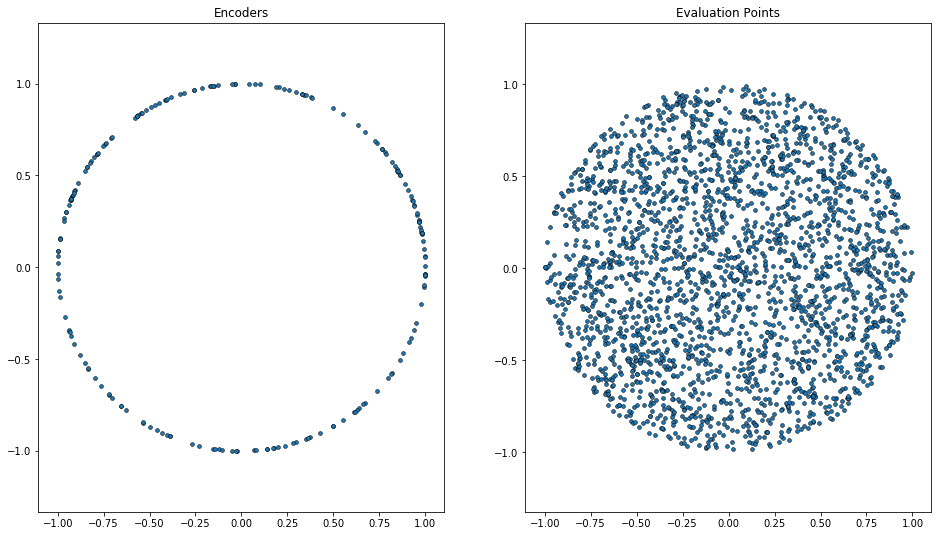

In [4]:
plot_eval_encoders(nengo)

Now let's try the exact same thing, but using `nengolib.Network()` instead of `nengo.Network()`.

Building finished in 0:00:01.                                                   


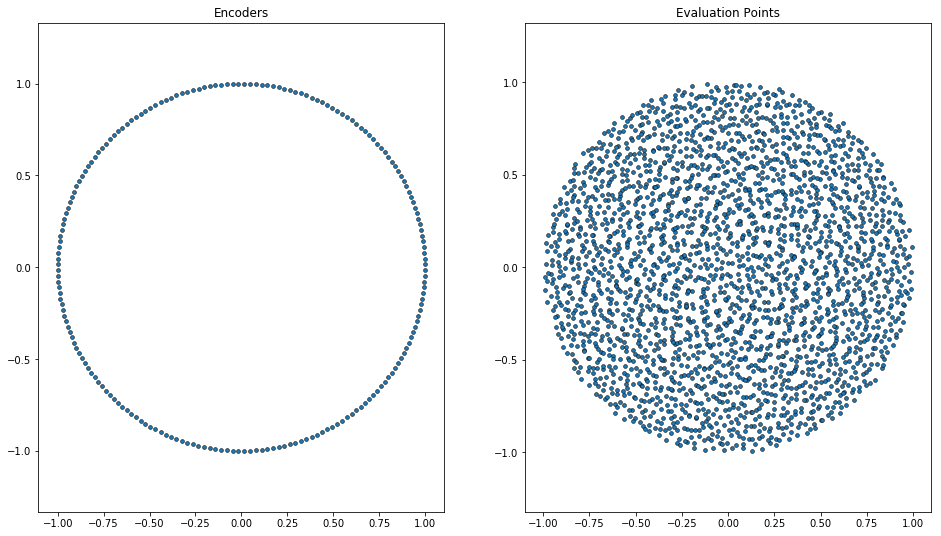

In [5]:
plot_eval_encoders(nengolib)

Both samples become more uniform. The number of sample points are the same, but there are far fewer clumps and open spaces than there were for the default distributions.

Some theory from **number-theoretic sequences** tells us that the number of evaluation points is effectively **squared** versus the defaults ([details](https://arvoelke.github.io/nengolib-docs/notebooks.research.sampling_high_dimensional_vectors.html)). The improvement for the encoders is much harder to measure theoretically, since it alters the tuning curves and thus depends on the function being computed. However, empirical results indicate that it at least improves the identity function.

Takeaway: `nengolib.Network()` is a drop-in replacement for `nengo.Network()` that makes these automatically become the default distributions. This should just work right out of the box, and should very rarely make things worse.

## 2) Unified Language for Linear Time-Invariant (LTI) Systems

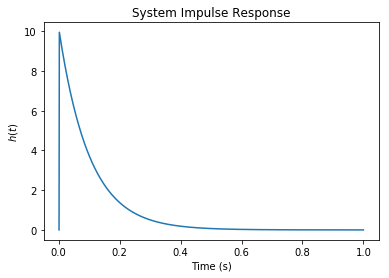

In [6]:
sys = nengolib.Lowpass(0.1)

plt.figure()
plt.title("System Impulse Response")
plt.plot(sys.ntrange(1000), nengolib.signal.shift(sys.impulse(1000)))
plt.xlabel("Time (s)")
plt.ylabel("$h(t)$")
plt.show()

This system is equivalent to `nengo.Lowpass`, and can be used in the same way (they both derive the same base object in Nengo).

In [7]:
assert sys == nengo.Lowpass(0.1)
assert isinstance(sys, nengo.synapses.Synapse)

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


/home/arvoelke/.local/lib/python2.7/site-packages/nengolib/signal/system.py:197: UserWarning: y0 (None!=0) does not properly initialize the system; see Nengo issue #1124.
  "Nengo issue #1124." % y0, UserWarning)


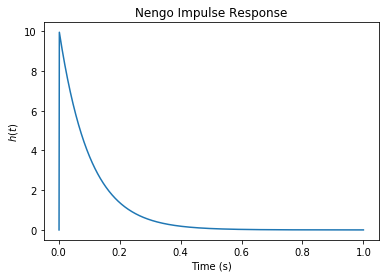

In [8]:
with nengolib.Network() as model:
    p = nengo.Probe(nengo.Node(output=lambda t: 1000 if t <= 1e-3 else 0), synapse=sys)

with nengo.Simulator(model) as sim:
    sim.run(1)

plt.figure()
plt.title("Nengo Impulse Response")
plt.plot(sim.trange(), sim.data[p])
plt.xlabel("Time (s)")
plt.ylabel("$h(t)$")
plt.show()

In [66]:
from nengolib_notebook_magic import *
import nengolib_notebook_magic
reload(nengolib_notebook_magic)

latex_tf(sys)

$H(s) = \frac{1}{0.1 s + 1}$

In [67]:
latex_tf(sys**2)

$H(s) = \frac{1}{0.01 s^2 + 0.2 s + 1}$

In [68]:
from nengolib.signal import s
latex_tf(s**-1)

$H(s) = \frac{1}{ s}$